In [20]:
import pandas as pd
import numpy as np

In [21]:
df= pd.read_csv('train.csv')
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [22]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.isnull().sum()   

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
# create a new column with the title of the person
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# create a new column with the last name of the person
df['Last_Name'] = df['Name'].apply(lambda x: x.split(',')[0].strip())


In [26]:
# check the title of the person and the missing age
title_comparison = pd.DataFrame({
    'Total': df['Title'].value_counts(),
    'Missing Age': df[df['Age'].isnull()]['Title'].value_counts()
})

print(title_comparison)

              Total  Missing Age
Title                           
Capt              1          NaN
Col               2          NaN
Don               1          NaN
Dr                7          1.0
Jonkheer          1          NaN
Lady              1          NaN
Major             2          NaN
Master           40          4.0
Miss            182         36.0
Mlle              2          NaN
Mme               1          NaN
Mr              517        119.0
Mrs             125         17.0
Ms                1          NaN
Rev               6          NaN
Sir               1          NaN
the Countess      1          NaN


In [27]:
# Group rare titles into one group
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Jonkheer', 'Don', 'Sir', 'Capt', 'Lady', 'the Countess', 'Dona', 'Mlle', 'Mme'], 'Rare')

# Calculate median ages for each title group
title_age_median = df.groupby('Title')['Age'].median()
title_age_median

df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [28]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [29]:
# # Filling missing Age with median
# df['Age'].fillna(df['Age'].title_age_median[df['Title']], inplace=True)

# Create a new colum for has_cabin
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Create a new colum for family size
df['family_size'] = df['SibSp'] + df['Parch'] + 1


In [30]:
df['Age_cat'] = df['Age'].apply(lambda x: 'Kid' if x <= 15 else ('Adult' if x <= 60 else 'Elderly'))


In [31]:
# Function to extract deck from cabin
def get_deck(cabin):
    if pd.isnull(cabin):
        return 'Unknown'
    else:
        return cabin[0]

# Apply the function to create the deck column
df['Deck'] = df['Cabin'].apply(get_deck)

# Placeholder for cabin assignments
cabin_assignments = {
    # Add your cabin assignments here, for example:
    'Braund': 'C',
    'Cumings': 'B',
    # Add more assignments as needed
}

# Assign deck based on lastname and family size if cabin is null
for last_name, group in df[df['Deck'] == 'Unknown'].groupby('Last_Name'):
    if last_name in cabin_assignments:
        assigned_deck = cabin_assignments[last_name]
        df.loc[(df['Last_Name'] == last_name) & (df['Deck'] == 'Unknown'), 'Deck'] = assigned_deck

print(df[['Cabin', 'Deck', 'Last_Name', 'family_size']].head(10))

  Cabin     Deck  Last_Name  family_size
0   NaN        C     Braund            2
1   C85        C    Cumings            2
2   NaN  Unknown  Heikkinen            1
3  C123        C   Futrelle            2
4   NaN  Unknown      Allen            1
5   NaN  Unknown      Moran            1
6   E46        E   McCarthy            1
7   NaN  Unknown    Palsson            5
8   NaN  Unknown    Johnson            3
9   NaN  Unknown     Nasser            2


In [32]:
df.isnull().sum()   

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Last_Name        0
Has_Cabin        0
family_size      0
Age_cat          0
Deck             0
dtype: int64

In [33]:
df['Age_cat'].value_counts()


Age_cat
Adult      782
Kid         87
Elderly     22
Name: count, dtype: int64

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df_bar = pd.DataFrame([survived,dead])
    df_bar.index = ['Survived','Dead']
    df_bar.plot(kind='bar',stacked=True, figsize=(10,5))

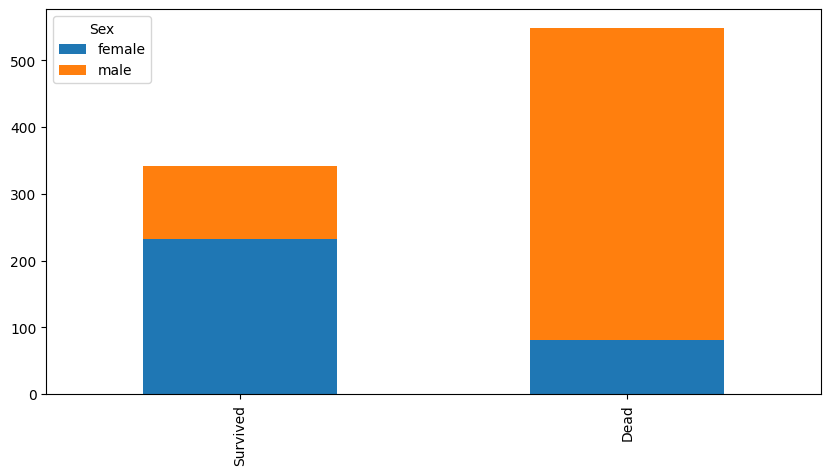

In [35]:
bar_chart('Sex')

The chart confirms that Females are most likely to survive

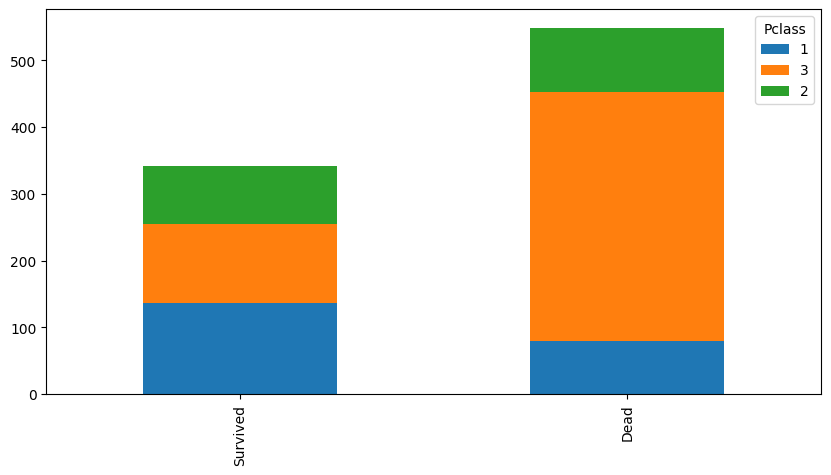

In [36]:
bar_chart('Pclass')

The chart confirms that 1st class passengers are more likely to survive while 3rd class passengers are more likely to die 

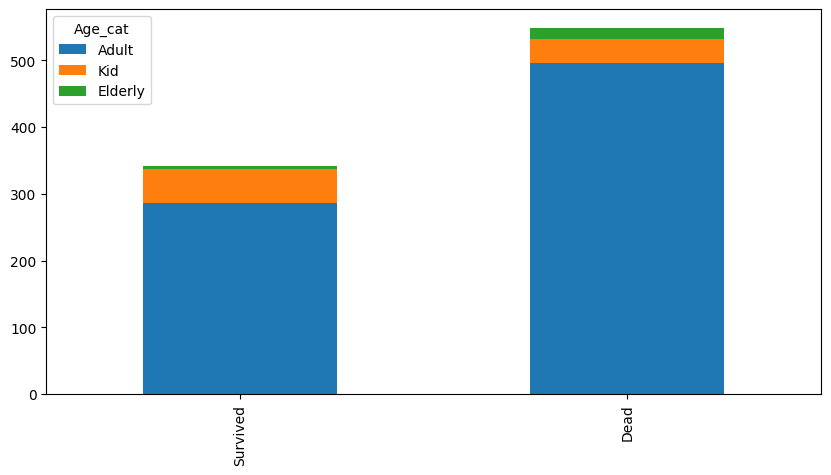

In [37]:
bar_chart('Age_cat')

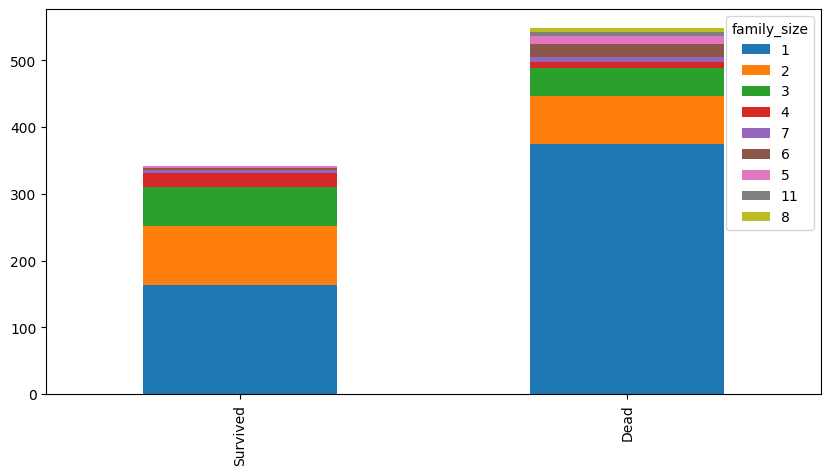

In [38]:
bar_chart('family_size')

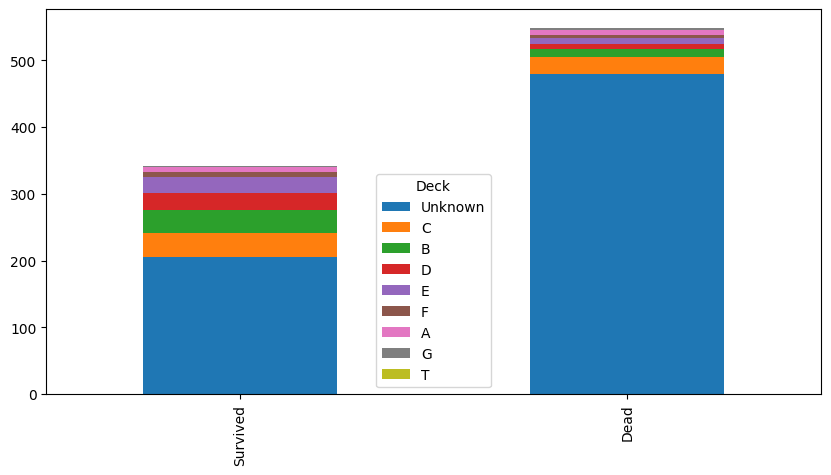

In [39]:
bar_chart('Deck')

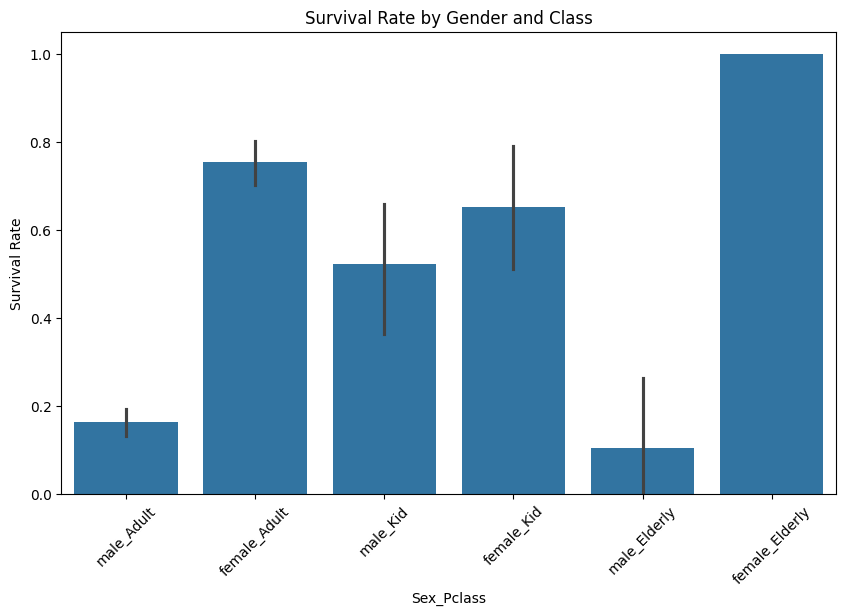

In [40]:
# create a combined feature for gender and class
df['Sex_Pclass'] = df['Sex'] + '_' + df['Age_cat'].astype(str)

# Plot survival rate by gender and class
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_Pclass', y='Survived', data=df)
plt.title('Survival Rate by Gender and Class')
plt.ylabel('Survival Rate')
plt.xlabel('Sex_Pclass')
plt.xticks(rotation=45)
plt.show()

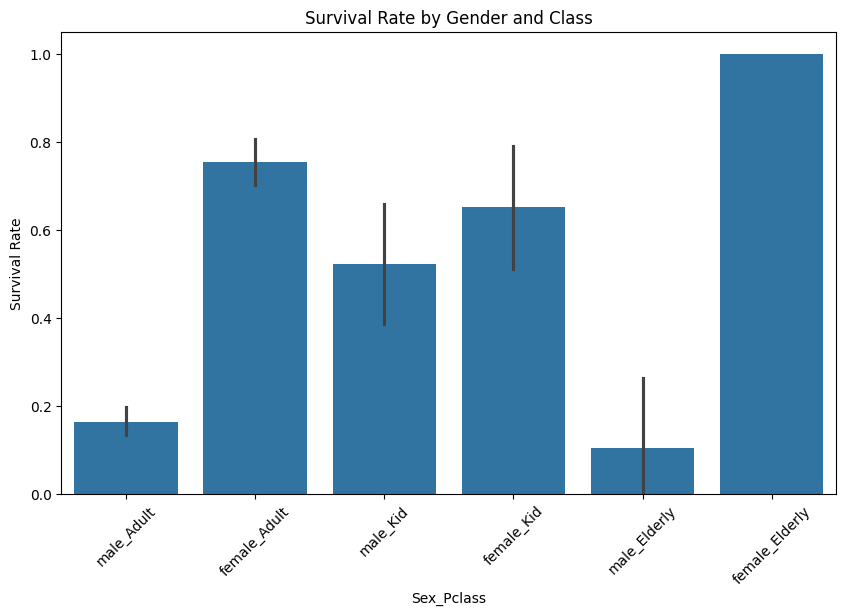

In [41]:
# create a combined feature for gender and class
df['Sex_Age_cat'] = df['Sex'] + '_' + df['Age_cat'].astype(str)

# Plot survival rate by gender and class
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_Pclass', y='Survived', data=df)
plt.title('Survival Rate by Gender and Class')
plt.ylabel('Survival Rate')
plt.xlabel('Sex_Pclass')
plt.xticks(rotation=45)
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

df['Sex_bin'] = df['Sex'].map({'male' : 1, 'female' : 0})
Bt_features = ['Pclass', 'Age', 'Sex_bin' ] 
X = df[Bt_features]
y = df['Survived']  

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

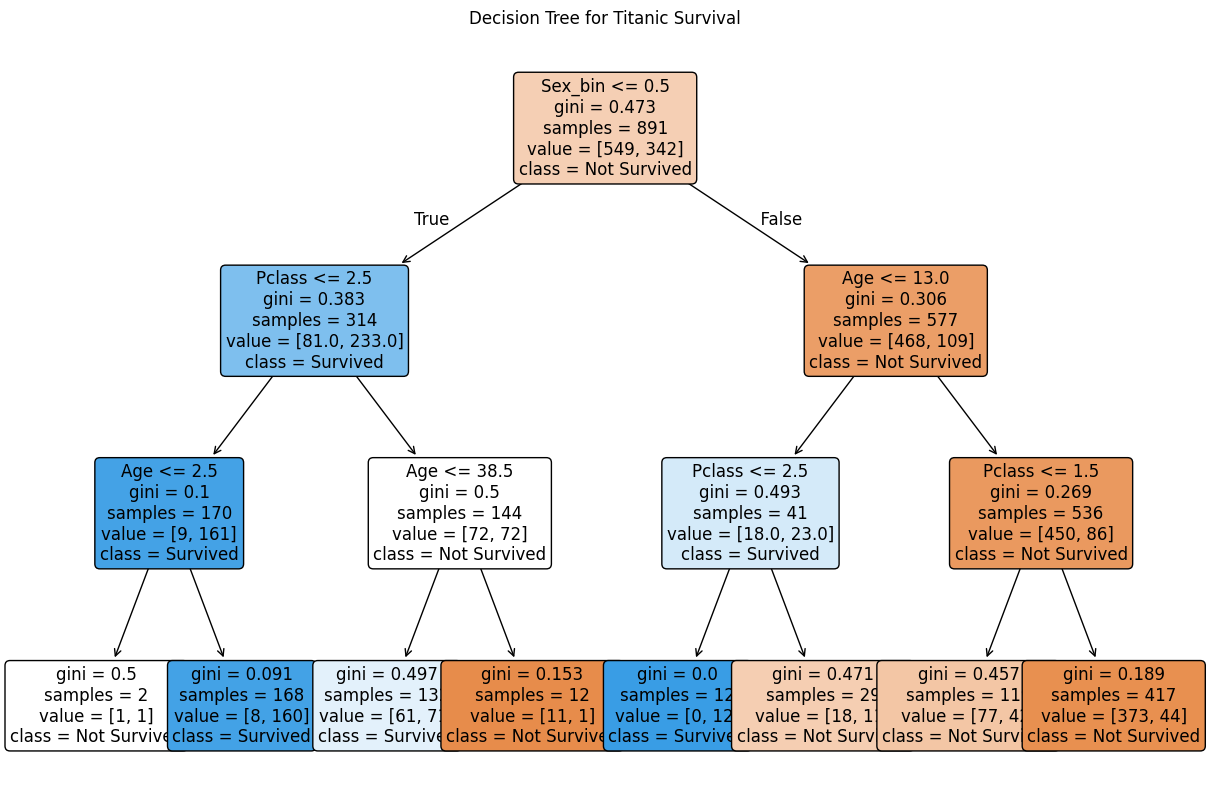

In [43]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=Bt_features, class_names=['Not Survived', 'Survived'], 
          filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree for Titanic Survival')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Encode categorical values
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Deck', 'Title', 'Age_cat'], drop_first=True)

# Remove unnecessary features
features_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Last_Name', 'Sex_Pclass', 'Sex_Age_cat']
df_encoded = df_encoded.drop(columns=features_to_drop)

# Define features and target variable
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[88 17]
 [14 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       105
           1       0.78      0.81      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



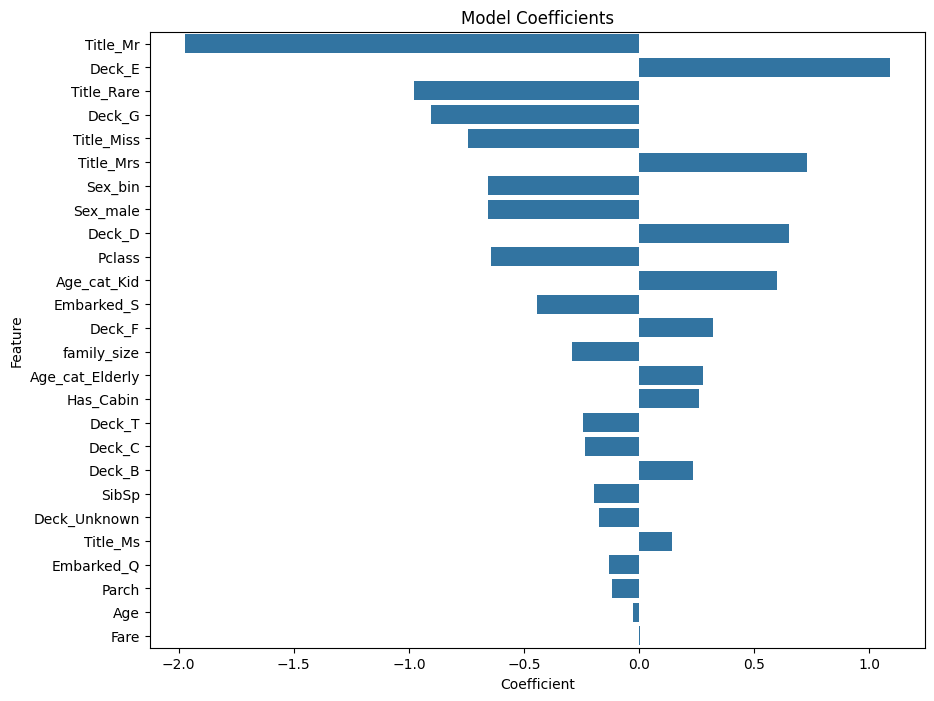

In [46]:
# Get the model coefficients
coefficients = model.coef_[0]
features = X.columns

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Model Coefficients')
plt.show()